In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import pymc3 as pm3
#setting of the figures
font = {'family' : 'serif','size': 15}
plt.rc('font', **font)
plt.rc('text', usetex=False) #Had to turn off to run show plot or else Latex error
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.dpi']= 100

In [20]:
data=fits.open('OIII(93.51157)-Spectra.fits')
data1=fits.open('OIII(88)-2Gauss.fits')
data2=fits.open('OIII(88)-3Gauss.fits')

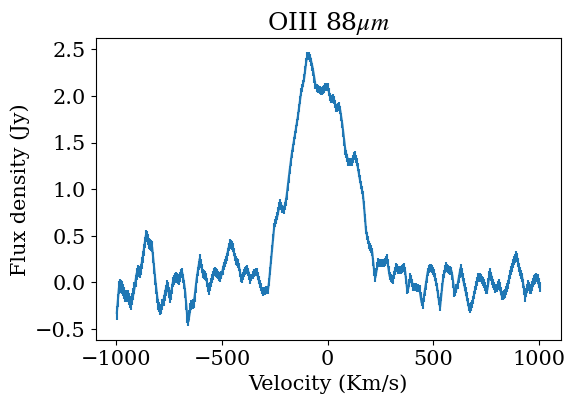

In [6]:
plt.errorbar(data[1].data['wave'],data[1].data['flux'],yerr=np.sqrt(1/data[1].data['weight']))
plt.xlabel('Velocity (Km/s)')
plt.ylabel('Flux density (Jy)')
plt.title('OIII 88$\mu m$')
plt.show()

In [7]:
v=data[1].data['wave']
F=data[1].data['flux']
eF=np.sqrt(1/data[1].data['weight'])

In [8]:
v = v.astype('float64') 
F = F.astype('float64') 
eF = eF.astype('float64')

In [9]:
def gaussian (x_,A_,mu_,sigma_):
    return A_*np.exp(-(x_ - mu_)**2 / (2 * sigma_**2))

In [10]:
with pm3.Model() as model:   
    mu = pm3.Uniform('mu', lower=v.min(), upper=v.max())
    sigma = pm3.Uniform('sigma', lower=0, upper=(v.max()-v.min())/2)
    A=pm3.Uniform('A', lower=0, upper=F.max())
    gaussian_1 = gaussian (v,A,mu,sigma)
    obs = pm3.Normal('obs', gaussian_1, sd=eF, observed=F)
    trace = pm3.sample_smc(10000)

Initializing SMC sampler...
Sampling 8 chains in 8 jobs
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.000
Stage:   4 Beta: 0.001
Stage:   5 Beta: 0.002
Stage:   6 Beta: 0.004
Stage:   7 Beta: 0.011
Stage:   8 Beta: 0.030
Stage:   9 Beta: 0.076
Stage:  10 Beta: 0.192
Stage:  11 Beta: 0.496
Stage:  12 Beta: 1.000
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.000
Stage:   4 Beta: 0.001
Stage:   5 Beta: 0.002
Stage:   6 Beta: 0.004
Stage:   7 Beta: 0.012
Stage:   8 Beta: 0.031
Stage:   9 Beta: 0.080
Stage:  10 Beta: 0.203
Stage:  11 Beta: 0.521
Stage:  12 Beta: 1.000
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.000
Stage:   4 Beta: 0.001
Stage:   5 Beta: 0.002
Stage:   6 Beta: 0.004
Stage:   7 Beta: 0.011
Stage:   8 Beta: 0.030
Stage:   9 Beta: 0.077
Stage:  10 Beta: 0.196
Stage:  11 Beta: 0.505
Stage:  12 Beta: 1.000
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
S

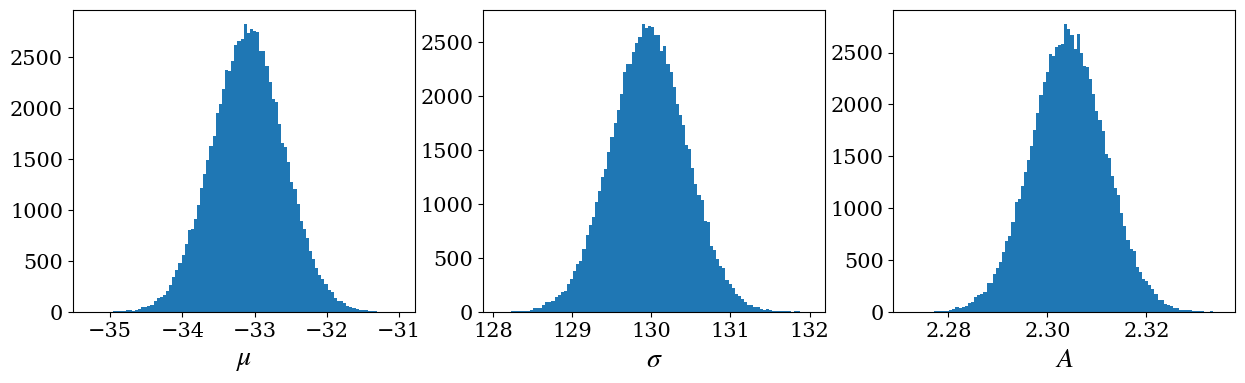

In [11]:
fig, ax = plt.subplots(1, 3,  figsize=(15,4))

ax[0].hist(trace["mu"],bins=100)
ax[0].set_xlabel('$\mu$',fontsize=20)
ax[1].hist(trace["sigma"],bins=100)
ax[1].set_xlabel('$\sigma$',fontsize=20)
ax[2].hist(trace["A"],bins=100)
ax[2].set_xlabel('$A$',fontsize=20)

plt.show()

In [12]:
m=np.mean(trace["mu"])
s=np.mean(trace["sigma"])
a=np.mean(trace["A"])

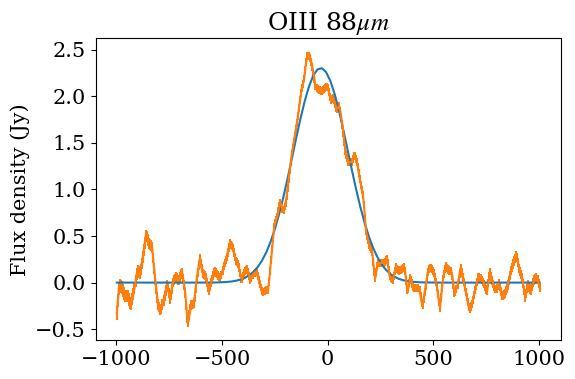

In [13]:
x=np.linspace(v.min(),v.max(),100)
plt.errorbar(x,gaussian (x,a,m,s))
plt.errorbar(data[1].data['wave'],data[1].data['flux'],yerr=np.sqrt(1/data[1].data['weight']))
plt.ylabel('Flux density (Jy)')
plt.title('OIII 88$\mu m$')
plt.show()

In [14]:
print(trace.report.log_marginal_likelihood)

[-1855.58405543 -1855.50036519 -1855.64424418 -1855.57073256
 -1855.64001131 -1855.501843   -1855.62433163 -1855.5858837 ]


# 2 Gaussians

In [50]:
with pm3.Model() as model:
    mu = pm3.Uniform('mu', lower=-50, upper=50)
    sigma = pm3.Uniform('sigma', lower=0, upper=(v.max()-v.min())/2)
    A=pm3.Uniform('A', lower=0, upper=F.max())
    
    mu1 = pm3.Uniform('mu1', lower=v.min(), upper=v.max())
    sigma1 = pm3.Uniform('sigma1', lower=0, upper=(v.max()-v.min())/2)
    A1=pm3.Uniform('A1', lower=0, upper=F.max())
    
    gaussian_2 = gaussian (v,A,mu,sigma)+gaussian (v,A1,mu1,sigma1)
    obs = pm3.Normal('obs', gaussian_2, sd=eF, observed=F)
    trace2 = pm3.sample_smc(10000)

Initializing SMC sampler...
Sampling 8 chains in 8 jobs
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.000
Stage:   4 Beta: 0.001
Stage:   5 Beta: 0.002
Stage:   6 Beta: 0.003
Stage:   7 Beta: 0.005
Stage:   8 Beta: 1.000
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.000
Stage:   4 Beta: 0.001
Stage:   5 Beta: 0.002
Stage:   6 Beta: 0.004
Stage:   7 Beta: 0.007
Stage:   8 Beta: 0.011
Stage:   9 Beta: 0.015
Stage:  10 Beta: 0.024
Stage:  11 Beta: 0.039
Stage:  12 Beta: 0.074
Stage:  13 Beta: 0.137
Stage:  14 Beta: 0.244
Stage:  15 Beta: 0.418
Stage:  16 Beta: 0.703
Stage:  17 Beta: 1.000
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.000
Stage:   4 Beta: 0.001
Stage:   5 Beta: 0.002
Stage:   6 Beta: 0.004
Stage:   7 Beta: 0.007
Stage:   8 Beta: 0.011
Stage:   9 Beta: 0.016
Stage:  10 Beta: 0.025
Stage:  11 Beta: 0.042
Stage:  12 Beta: 0.078
Stage:  13 Beta: 0.143
S

In [51]:
m=np.mean(trace2["mu"])
s=np.mean(trace2["sigma"])
a=np.mean(trace2["A"])

m1=np.mean(trace2["mu1"])
s1=np.mean(trace2["sigma1"])
a1=np.mean(trace2["A1"])

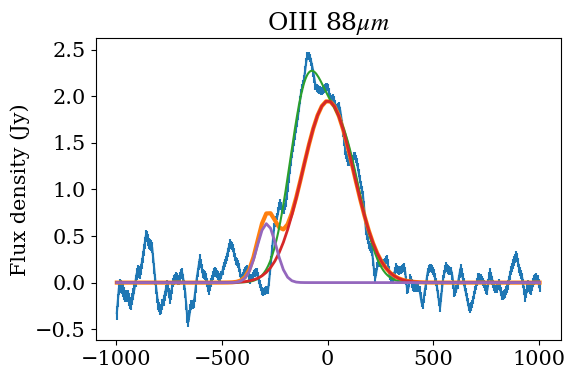

In [24]:
x=np.linspace(v.min(),v.max(),100)
plt.errorbar(data[1].data['wave'],data[1].data['flux'],yerr=np.sqrt(1/data[1].data['weight']))
plt.errorbar(x,gaussian (x,a,m,s)+gaussian(x,a1,m1,s1),linewidth=3)
plt.errorbar(data1[1].data['wave'],data1[1].data['flux'])
plt.errorbar(x,gaussian (x,a,m,s),linewidth=2)
plt.errorbar(x,gaussian(x,a1,m1,s1),linewidth=2)
plt.ylabel('Flux density (Jy)')
plt.title('OIII 88$\mu m$')
plt.show()

In [55]:
print(trace2.report.log_marginal_likelihood)

[-1287.44198735 -1270.42193206 -1265.68509106 -1263.1115917
 -1270.20192772 -1244.08226674 -1268.42837551 -1268.31139466]


# 3 Gaussians

In [15]:
with pm3.Model() as model:
    mu = pm3.Uniform('mu', lower=-50, upper=50)
    sigma = pm3.Uniform('sigma', lower=0, upper=(v.max()-v.min())/2)
    A=pm3.Uniform('A', lower=0, upper=F.max())
    
    mu1 = pm3.Uniform('mu1', lower=v.min(), upper=v.max())
    sigma1 = pm3.Uniform('sigma1', lower=0, upper=(v.max()-v.min())/2)
    A1=pm3.Uniform('A1', lower=0, upper=F.max())
    
    mu2 = pm3.Uniform('mu2', lower=v.min(), upper=v.max())
    sigma2 = pm3.Uniform('sigma2', lower=0, upper=(v.max()-v.min())/2)
    A2=pm3.Uniform('A2', lower=0, upper=F.max())
    
    gaussian_3 = gaussian (v,A,mu,sigma)+gaussian (v,A1,mu1,sigma1)+gaussian (v,A2,mu2,sigma2)
    obs = pm3.Normal('obs', gaussian_3, sd=eF, observed=F)
    trace3 = pm3.sample_smc(10000)

Initializing SMC sampler...
Sampling 8 chains in 8 jobs
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.000
Stage:   4 Beta: 0.000
Stage:   5 Beta: 0.001
Stage:   6 Beta: 0.001
Stage:   7 Beta: 0.003
Stage:   8 Beta: 0.005
Stage:   9 Beta: 0.007
Stage:  10 Beta: 0.011
Stage:  11 Beta: 0.021
Stage:  12 Beta: 0.030
Stage:  13 Beta: 0.037
Stage:  14 Beta: 0.050
Stage:  15 Beta: 0.072
Stage:  16 Beta: 0.110
Stage:  17 Beta: 0.170
Stage:  18 Beta: 0.262
Stage:  19 Beta: 0.397
Stage:  20 Beta: 0.586
Stage:  21 Beta: 0.847
Stage:  22 Beta: 1.000
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.000
Stage:   4 Beta: 0.000
Stage:   5 Beta: 0.001
Stage:   6 Beta: 0.001
Stage:   7 Beta: 0.003
Stage:   8 Beta: 0.005
Stage:   9 Beta: 0.008
Stage:  10 Beta: 0.013
Stage:  11 Beta: 0.021
Stage:  12 Beta: 0.027
Stage:  13 Beta: 0.034
Stage:  14 Beta: 0.043
Stage:  15 Beta: 0.061
Stage:  16 Beta: 0.079
Stage:  17 Beta: 0.105
S

In [16]:
m=np.mean(trace3["mu"])
s=np.mean(trace3["sigma"])
a=np.mean(trace3["A"])

m1=np.mean(trace3["mu1"])
s1=np.mean(trace3["sigma1"])
a1=np.mean(trace3["A1"])

m2=np.mean(trace3["mu2"])
s2=np.mean(trace3["sigma2"])
a2=np.mean(trace3["A2"])

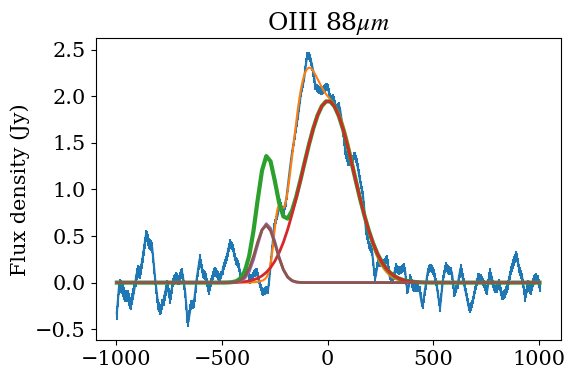

In [23]:
x=np.linspace(v.min(),v.max(),100)
plt.errorbar(data[1].data['wave'],data[1].data['flux'],yerr=np.sqrt(1/data[1].data['weight']))
plt.errorbar(data2[1].data['wave'],data2[1].data['flux'])
plt.errorbar(x,gaussian (x,a,m,s)+gaussian(x,a1,m1,s1)+gaussian(x,a2,m2,s2),linewidth=3)
plt.errorbar(x,gaussian (x,a,m,s),linewidth=2)
plt.errorbar(x,gaussian(x,a1,m1,s1),linewidth=2)
plt.errorbar(x,gaussian(x,a2,m2,s2),linewidth=2)
plt.ylabel('Flux density (Jy)')
plt.title('OIII 88$\mu m$')
plt.show()

In [ ]:
print(trace3.report.log_marginal_likelihood)

# 4 Gaussians

In [24]:
with pm3.Model() as model:
    mu = pm3.Uniform('mu', lower=-50, upper=50)
    sigma = pm3.Uniform('sigma', lower=0, upper=(v.max()-v.min())/2)
    A = pm3.Uniform('A', lower=0, upper=F.max())
    
    mu1 = pm3.Uniform('mu1', lower=v.min(), upper=v.max())
    sigma1 = pm3.Uniform('sigma1', lower=0, upper=(v.max()-v.min())/2)
    A1 = pm3.Uniform('A1', lower=0, upper=F.max())
    
    mu2 = pm3.Uniform('mu2', lower=v.min(), upper=v.max())
    sigma2 = pm3.Uniform('sigma2', lower=0, upper=(v.max()-v.min())/2)
    A2 = pm3.Uniform('A2', lower=0, upper=F.max())
    
    mu3 = pm3.Uniform('mu3', lower=v.min(), upper=v.max())
    sigma3 = pm3.Uniform('sigma3', lower=0, upper=(v.max()-v.min())/2)
    A3 = pm3.Uniform('A3', lower=0, upper=F.max())
    
    gaussian_4 = gaussian (v,A,mu,sigma)+gaussian (v,A1,mu1,sigma1)+gaussian (v,A2,mu2,sigma2)+gaussian (v,A3,mu3,sigma3)
    obs = pm3.Normal('obs', gaussian_4, sd=eF, observed=F)
    trace4 = pm3.sample_smc(10000) #Is this because it's trying to model a negative component? (for Trace Error)

Initializing SMC sampler...
Sampling 8 chains in 8 jobs
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.000
Stage:   4 Beta: 0.000
Stage:   5 Beta: 0.000
Stage:   6 Beta: 0.001
Stage:   7 Beta: 0.001
Stage:   8 Beta: 0.002
Stage:   9 Beta: 0.004
Stage:  10 Beta: 0.006
Stage:  11 Beta: 0.009
Stage:  12 Beta: 0.015
Stage:  13 Beta: 0.024
Stage:  14 Beta: 0.036
Stage:  15 Beta: 0.046
Stage:  16 Beta: 0.056
Stage:  17 Beta: 0.089
Stage:  18 Beta: 0.110
Stage:  19 Beta: 0.136
Stage:  20 Beta: 0.172
Stage:  21 Beta: 0.220
Stage:  22 Beta: 0.283
Stage:  23 Beta: 0.367
Stage:  24 Beta: 0.475
Stage:  25 Beta: 0.617
Stage:  26 Beta: 0.800
Stage:  27 Beta: 1.000
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.000
Stage:   4 Beta: 0.000
Stage:   5 Beta: 0.000
Stage:   6 Beta: 0.001
Stage:   7 Beta: 0.001
Stage:   8 Beta: 0.003
Stage:   9 Beta: 0.004
Stage:  10 Beta: 0.007
Stage:  11 Beta: 0.013
Stage:  12 Beta: 0.019
S

ValueError: cannot convert float NaN to integer

In [25]:
m=np.mean(trace4["mu"])
s=np.mean(trace4["sigma"])
a=np.mean(trace4["A"])

m1=np.mean(trace4["mu1"])
s1=np.mean(trace4["sigma1"])
a1=np.mean(trace4["A1"])

m2=np.mean(trace4["mu2"])
s2=np.mean(trace4["sigma2"])
a2=np.mean(trace4["A2"])

m3=np.mean(trace4["mu3"])
s3=np.mean(trace4["sigma3"])
a3=np.mean(trace4["A3"])

NameError: name 'trace4' is not defined

In [ ]:
x=np.linspace(v.min(),v.max(),100)
plt.errorbar(data[1].data['wave'],data[1].data['flux'],yerr=np.sqrt(1/data[1].data['weight']))
plt.errorbar(x,gaussian (x,a,m,s)+gaussian(x,a1,m1,s1)+gaussian (x,a2,m2,s2)+gaussian (x,a3,m3,s3),linewidth=3)
plt.ylabel('Flux density (Jy)')
plt.title('NIII 57$\mu m$')
plt.show()

In [ ]:
print(trace4.report.log_marginal_likelihood)